# 5. Visualize the Data

Visualizing the Tweet Data

#### 5.1 Read In Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction import stop_words 
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer 
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
%store -r final_disaster_words
%store -r disaster_tweets
%store -r tweets_words

In [3]:
campfire = pd.read_csv('./data/campfire_tweets.csv')
carrfire = pd.read_csv('./data/carrfire_tweets.csv')
hurricane = pd.read_csv('./data/hurricane_tweets.csv')

#### 5.2 Plot the Data

In [4]:
campfire.drop_duplicates(subset ="text", keep = False, inplace = True)
carrfire.drop_duplicates(subset ="text", keep = False, inplace = True)
hurricane.drop_duplicates(subset ="text", keep = False, inplace = True)

In [5]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        tokenizer = RegexpTokenizer('(?u)\\b\\w\\w+\\b')
        return [self.wnl.lemmatize(t, 'v') for t in tokenizer.tokenize(doc)]

In [6]:
vectorizer = CountVectorizer(tokenizer = LemmaTokenizer(),
                            preprocessor = None,
                            stop_words = 'english',
                            max_features = 1500,
                            ngram_range= (1,2),
                            analyzer = 'word', 
                            min_df=1) 

camp_words = campfire['text']
carr_words = carrfire['text']
hurricane_words = hurricane['text']
camp_words = vectorizer.fit_transform(camp_words)
carr_words = vectorizer.fit_transform(carr_words)
hurricane_words = vectorizer.fit_transform(hurricane_words)
# convert into a dataframe
camp_words= pd.DataFrame(camp_words.toarray(), columns=vectorizer.get_feature_names())
carr_words= pd.DataFrame(carr_words.toarray(), columns=vectorizer.get_feature_names())
hurricane_words= pd.DataFrame(hurricane_words.toarray(), columns=vectorizer.get_feature_names())

/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['make'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [7]:
%store carr_words
%store camp_words
%store hurricane_words

Stored 'carr_words' (DataFrame)
Stored 'camp_words' (DataFrame)
Stored 'hurricane_words' (DataFrame)


In [8]:
df = tweets_words
df = tweets_words
carr = carr_words
camp = camp_words
harvey = hurricane_words
final_carr_df = carr.drop(columns = [i for i in carr.columns if i not in final_disaster_words])
final_camp_df = camp.drop(columns = [i for i in camp.columns if i not in final_disaster_words])
final_harvey_df = harvey.drop(columns = [i for i in harvey.columns if i not in final_disaster_words])
final_disaster_words_df = df.drop(columns = [i for i in df.columns if i not in final_disaster_words])

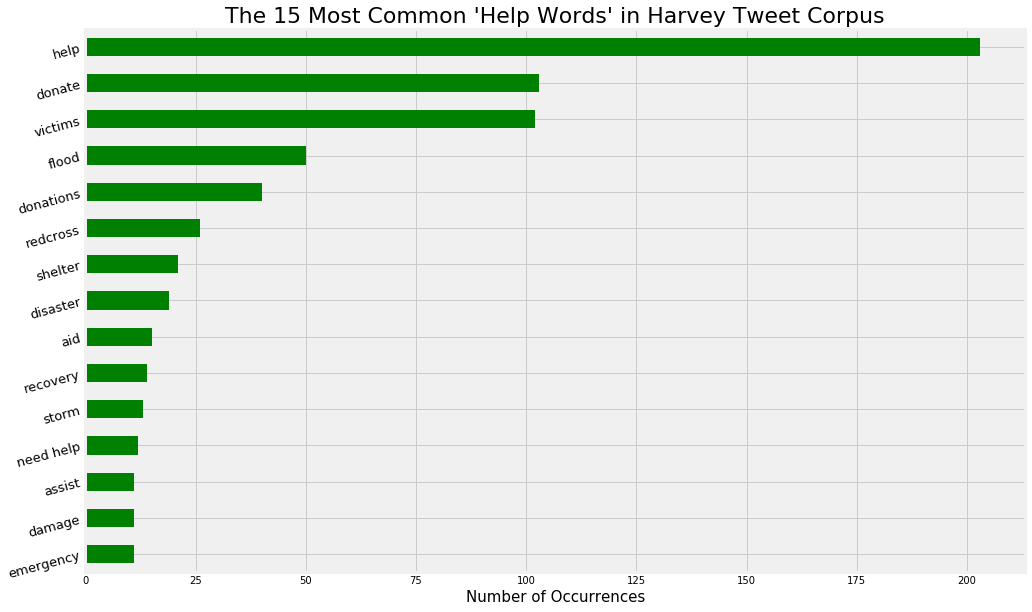

In [9]:
plt.figure(figsize=(15,10))
final_harvey_df.sum().sort_values(ascending=True).tail(15).plot.barh(color='green')
plt.yticks(rotation=15, fontsize=13)
plt.title("The 15 Most Common 'Help Words' in Harvey Tweet Corpus", fontsize=22)
plt.xlabel("Number of Occurrences", fontsize=15)
plt.show()

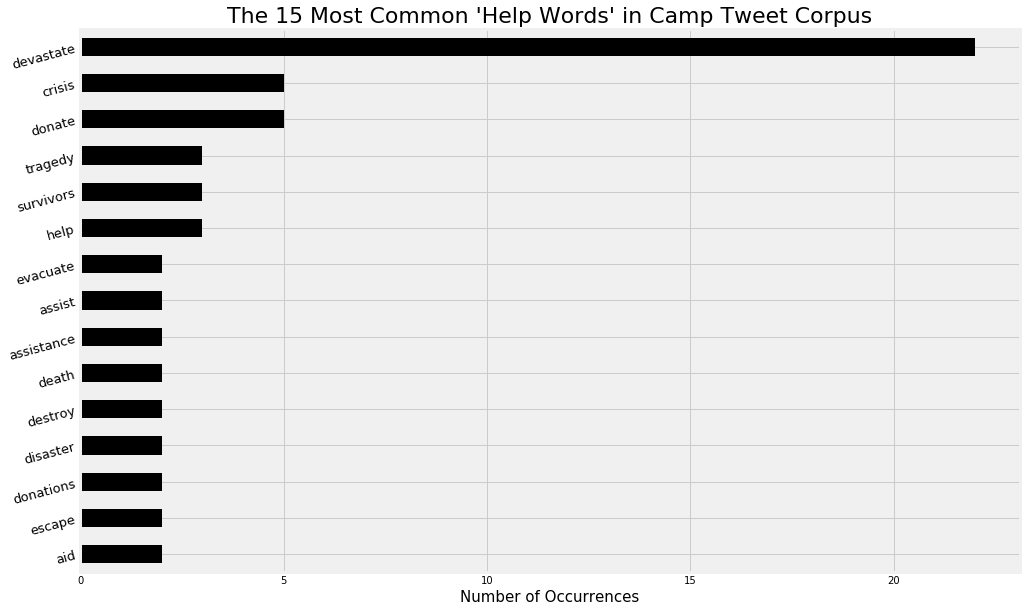

In [10]:
plt.figure(figsize=(15,10))
final_camp_df.sum().sort_values(ascending=True).tail(15).plot.barh(color='black')
plt.yticks(rotation=15, fontsize=13)
plt.title("The 15 Most Common 'Help Words' in Camp Tweet Corpus", fontsize=22)
plt.xlabel("Number of Occurrences", fontsize=15)
plt.show()

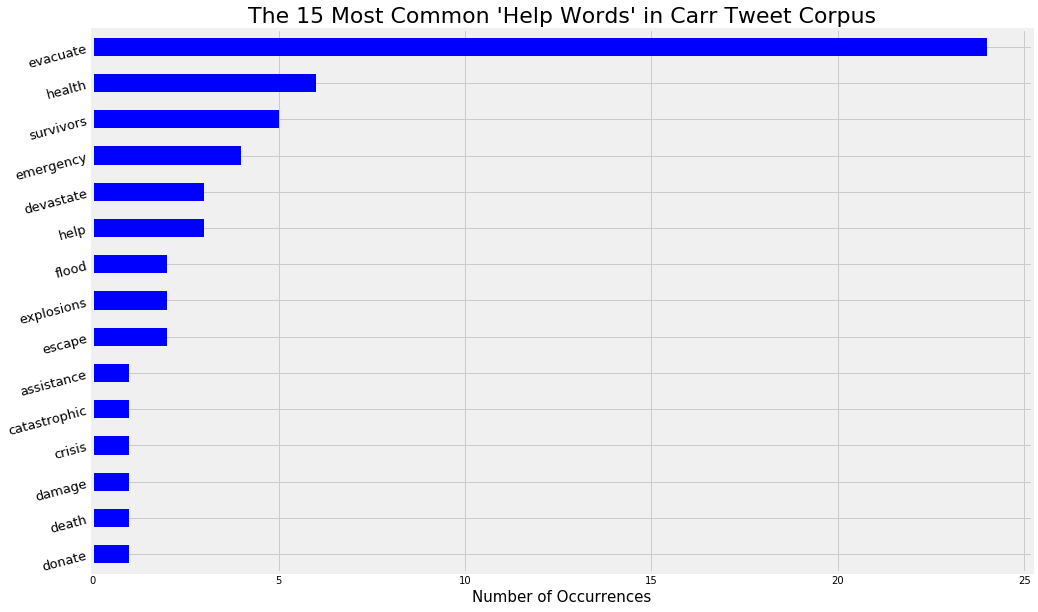

In [11]:
plt.figure(figsize=(15,10))
final_carr_df.sum().sort_values(ascending=True).tail(15).plot.barh(color='blue')
plt.yticks(rotation=15, fontsize=13)
plt.title("The 15 Most Common 'Help Words' in Carr Tweet Corpus", fontsize=22)
plt.xlabel("Number of Occurrences", fontsize=15)
plt.show()

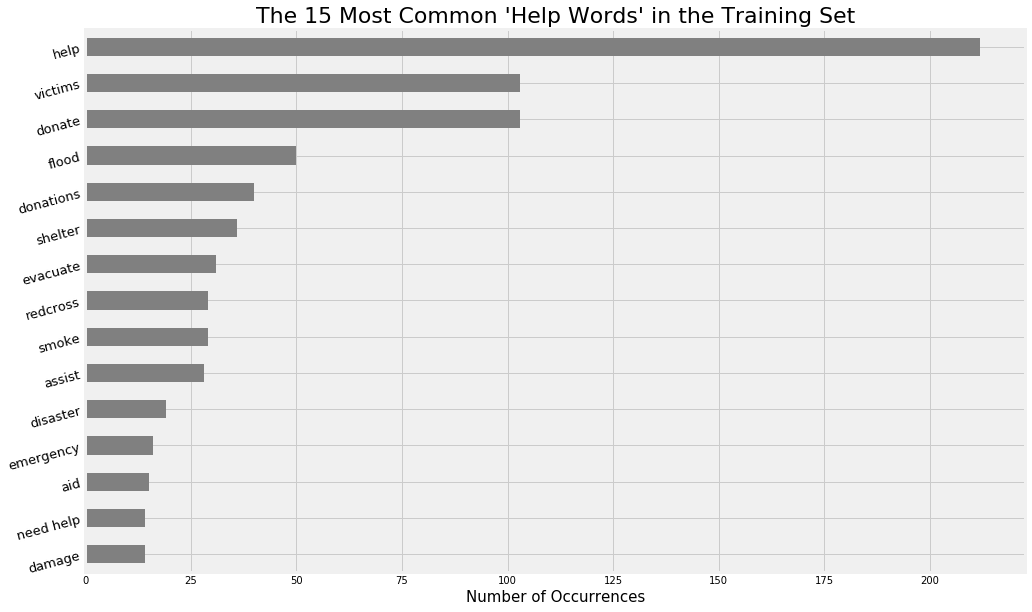

In [12]:
plt.figure(figsize=(15,10))
final_disaster_words_df.sum().sort_values(ascending=True).tail(15).plot.barh(color='grey')
plt.yticks(rotation=15, fontsize=13)
plt.title("The 15 Most Common 'Help Words' in the Training Set", fontsize=22)
plt.xlabel("Number of Occurrences", fontsize=15)
plt.show()
